**Import Required Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


**Load and Clean the Dataset**

In [4]:
# Load dataset
df = pd.read_csv("C:/Users/moraj/Downloads/Life Expectancy Data.csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Drop rows with missing target
df = df.dropna(subset=['Life_expectancy'])

# Fill numerical missing values
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Life_expectancy')
for col in num_cols:
    df[col] = df.groupby('Country')[col].transform(lambda x: x.fillna(x.median()))
    df[col] = df.groupby('Status')[col].transform(lambda x: x.fillna(x.median()))
    df[col] = df[col].fillna(df[col].median())

# Check for any remaining missing
print("Remaining missing values:", df.isnull().sum().sum())


Remaining missing values: 0


**Exploratory Data Analysis (EDA)**

In [5]:
# Basic stats
print(df.describe())

             Year  Life_expectancy  Adult_Mortality  infant_deaths  \
count  2928.00000      2928.000000      2928.000000    2928.000000   
mean   2007.50000        69.224932       164.796448      30.407445   
std       4.61056         9.523867       124.292079     118.114450   
min    2000.00000        36.300000         1.000000       0.000000   
25%    2003.75000        63.100000        74.000000       0.000000   
50%    2007.50000        72.100000       144.000000       3.000000   
75%    2011.25000        75.700000       228.000000      22.000000   
max    2015.00000        89.000000       723.000000    1800.000000   

           Alcohol  percentage_expenditure  Hepatitis_B        Measles  \
count  2928.000000             2928.000000  2928.000000    2928.000000   
mean      4.610236              740.321185    80.277322    2427.855874   
std       4.035810             1990.930605    24.597111   11485.970937   
min       0.010000                0.000000     1.000000       0.000000   

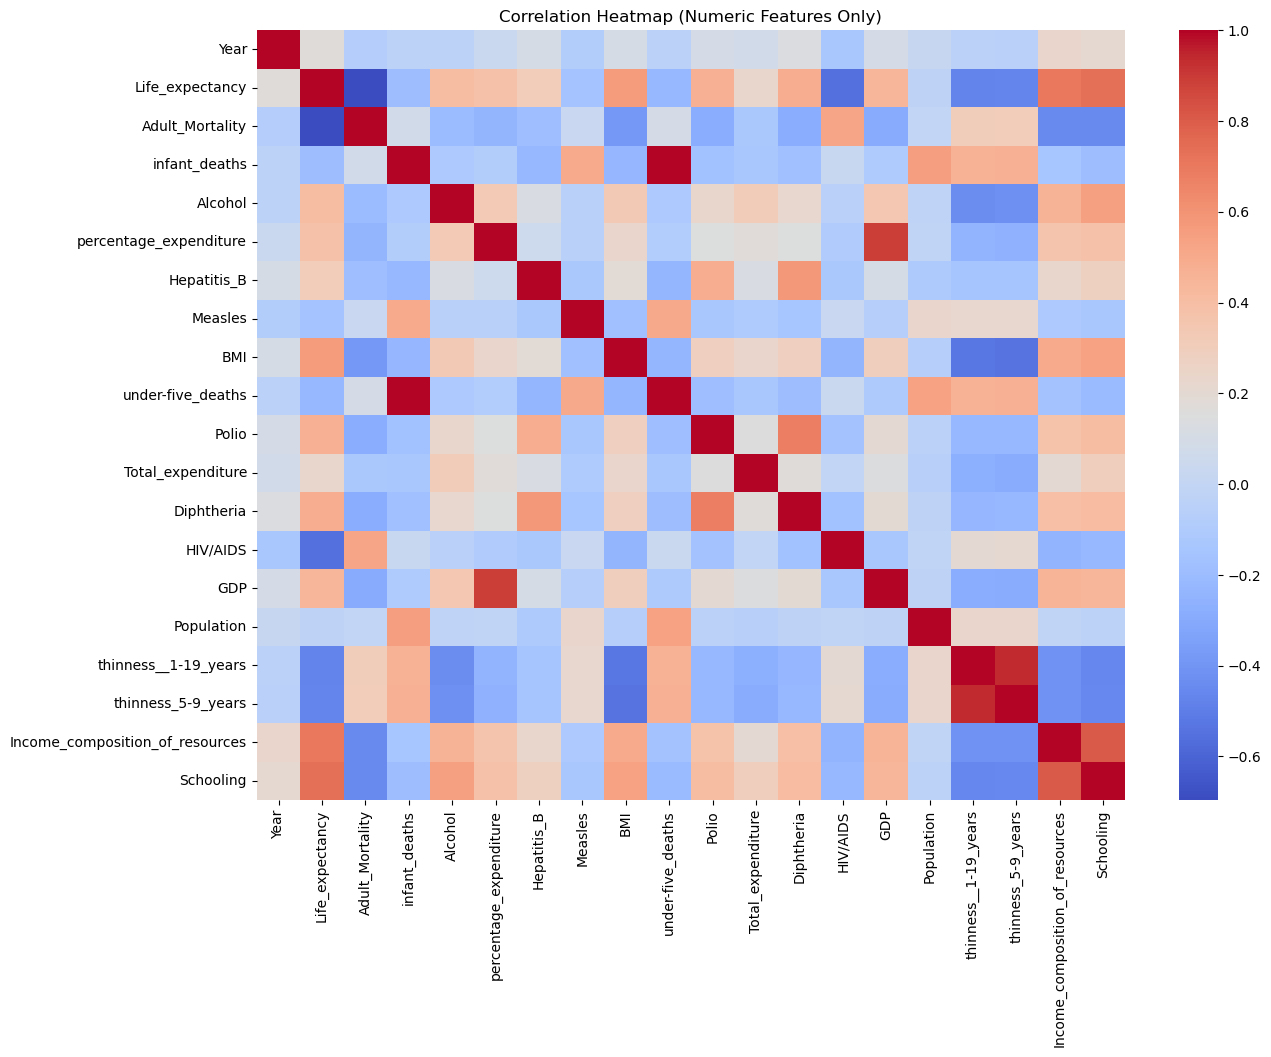

Top positive correlations:
 Life_expectancy                    1.000000
Schooling                          0.731799
Income_composition_of_resources    0.703099
BMI                                0.564409
Diphtheria                         0.485097
Polio                              0.471586
GDP                                0.448412
Alcohol                            0.408109
percentage_expenditure             0.381864
Hepatitis_B                        0.308833
Name: Life_expectancy, dtype: float64

Top negative correlations:
 under-five_deaths      -0.222529
thinness_5-9_years     -0.466401
thinness__1-19_years   -0.472177
HIV/AIDS               -0.556556
Adult_Mortality        -0.696359
Name: Life_expectancy, dtype: float64


In [6]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

# Top correlations with Life Expectancy
corr = numeric_df.corr()['Life_expectancy'].sort_values(ascending=False)
print("Top positive correlations:\n", corr.head(10))
print("\nTop negative correlations:\n", corr.tail(5))


**Visualization**

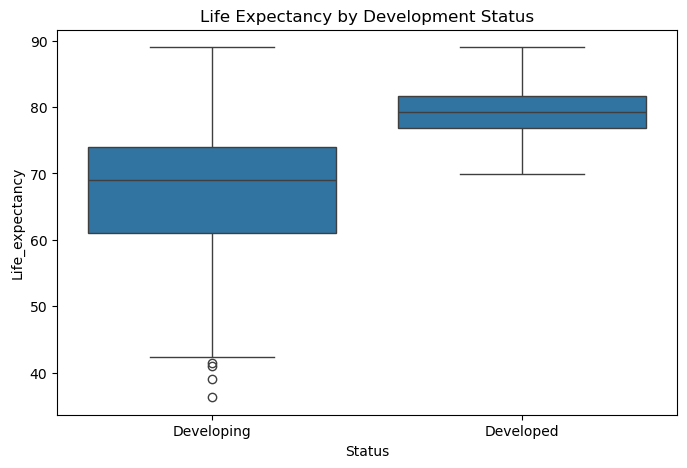

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Status', y='Life_expectancy', data=df)
plt.title("Life Expectancy by Development Status")
plt.show()


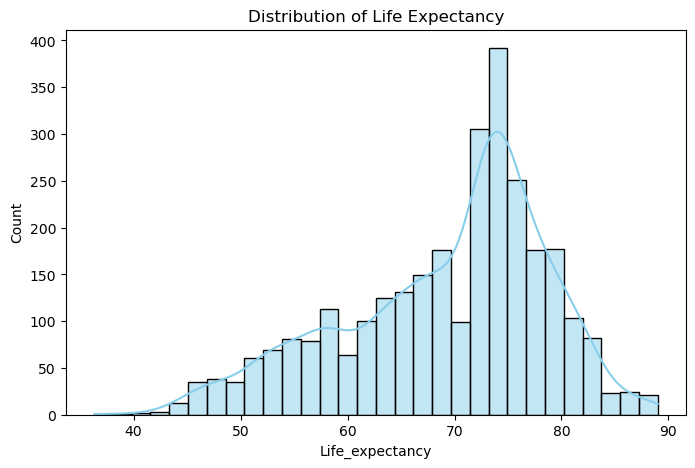

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Life_expectancy'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Life Expectancy")
plt.show()


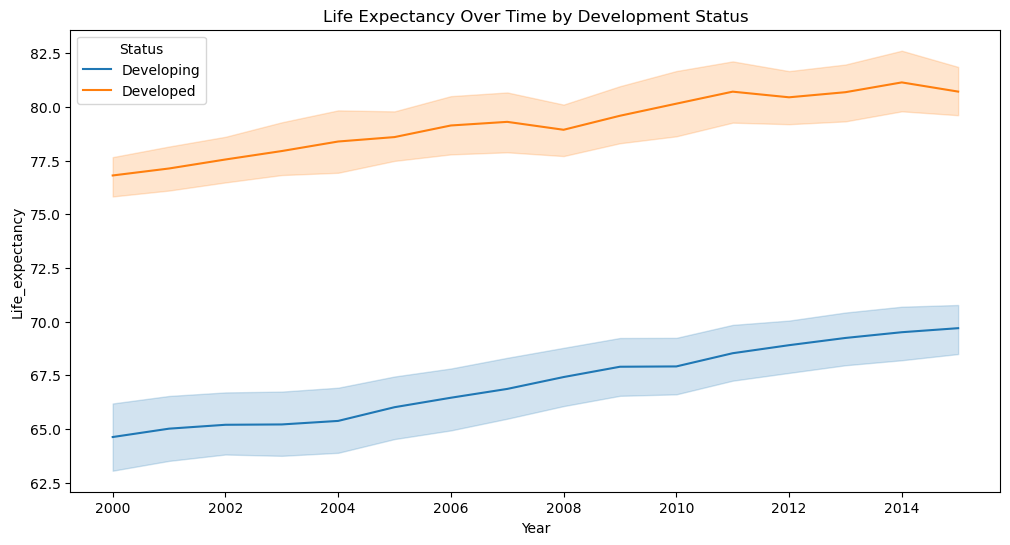

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Life_expectancy', hue='Status')
plt.title("Life Expectancy Over Time by Development Status")
plt.show()


**Feature Engineering**

In [17]:
# Convert categorical columns to dummy variables
df_ml = pd.get_dummies(df, columns=['Status', 'Country'], drop_first=True)


**Machine Learning – Random Forest Regression**

In [19]:
# Define features and target
X = df_ml.drop(columns=['Life_expectancy'])
y = df_ml['Life_expectancy']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R² Score: 0.9706818514005732
RMSE: 1.5924830708858482


C:\Users\moraj\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Feature Importance Plot**

In [ ]:
# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='teal')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()
